We Build a random forest model to predict the number of total affected records using different features as the company, the source of information, the type of attack, the year and the two formula given in the litterature by Olivier Lopez and Jacob.

Here we upload our data
Source : Privacy Rights ClearingHouse

In [102]:
from google.colab import files
uploaded = files.upload()

Saving donneesencoder.csv to donneesencoder (1).csv


We upload our library

In [103]:
import pandas as pd   # for data manipulation
from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.cluster import KMeans # for KMeans clustering
from sklearn.decomposition import PCA # for dimension reduction
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # used for plotting 
import numpy as np # useful for working with arrays
from sklearn.model_selection import train_test_split # for data splitting

In [104]:
df = pd.read_csv("donneesencoder.csv", sep= "\t")

In [105]:
df.shape

(5155, 12)

In [107]:
df["Total.Records"]=pd.to_numeric(df["Total.Records"], errors='coerce')

In [ ]:
 df.drop( df[ df['Type.of.breach'] == "PHYS"].index, inplace=True)

In [ ]:
df.shape

(5155, 12)

In [ ]:
df['Nb_Employees'] = df['Nb_Employees'].astype(int)

In [108]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1)

In [109]:
categ = ["Type.of.organization", "Type.of.breach", "Gather.Information.Source"]
 # One Hot Encoding conversion
df1 = pd.get_dummies(df, columns=categ)

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [111]:
df1.head()

,Company,Date.Made.Public,Total.Records,year,Nb_Employees,Amount1,Amount2,Type.of.organization_BSF,Type.of.organization_BSO,Type.of.organization_BSR,Type.of.organization_EDU,Type.of.organization_GOV,Type.of.organization_MED,Type.of.organization_NGO,Type.of.organization_Unknown,Type.of.breach_CARD,Type.of.breach_DISC,Type.of.breach_HACK,Type.of.breach_INSD,Type.of.breach_PORT,Type.of.breach_STAT,Gather.Information.Source_Media,Gather.Information.Source_Nonprofit organization,Gather.Information.Source_US GA: Federal - HIPAA,Gather.Information.Source_US GA: State
0,bullitt county public schools,2009-10-21,676.0,2009,500,3.062958e+05,5.997271e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,roane state community college,2009-10-21,14783.0,2009,2687,3.194487e+06,3.480557e+06,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,halifax health,2009-10-15,33000.0,2009,2687,5.881014e+06,5.500942e+06,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,suffolk community college,2009-10-04,300.0,2009,10,1.651938e+05,3.774359e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,eastern kentucky university,2009-09-23,5045.0,2009,200,1.411095e+06,1.885884e+06,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [112]:
df3 = df1.drop(["Company", "Date.Made.Public","Nb_Employees", "Amount1", "Amount2"], axis=1)

In [ ]:
df3.head()

,Total.Records,year,Type.of.organization_BSF,Type.of.organization_BSO,Type.of.organization_BSR,Type.of.organization_EDU,Type.of.organization_GOV,Type.of.organization_MED,Type.of.organization_NGO,Type.of.organization_Unknown,Type.of.breach_CARD,Type.of.breach_DISC,Type.of.breach_HACK,Type.of.breach_INSD,Type.of.breach_PORT,Type.of.breach_STAT,Gather.Information.Source_Media,Gather.Information.Source_Nonprofit organization,Gather.Information.Source_US GA: Federal - HIPAA,Gather.Information.Source_US GA: State
0,676.0,2009,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,14783.0,2009,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,33000.0,2009,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,300.0,2009,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5045.0,2009,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [113]:
X_data = df3.drop(['Total.Records'], axis=1)
y_data = df3['Total.Records']

In [114]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_data, y_data,test_size = 0.3, random_state=42)

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import  cross_val_score,GridSearchCV

In [116]:
rf_model = RandomForestRegressor(bootstrap = True, max_depth = 50, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 66 )
rf_model.fit(X_Train,y_Train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=66, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
rf_y_pred = rf_model.predict(X_val)

In [118]:
rf_y_pred_t = rf_model.predict(X_Train)

In [119]:
errors_test = abs(rf_y_pred - y_val)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 2), 'degrees.')

Mean Absolute Error: 2872653.09 degrees.


In [120]:
errors_train = abs(rf_y_pred_t - y_Train)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_train), 2), 'degrees.')

Mean Absolute Error: 1252174.72 degrees.


In [121]:
ecart = ((np.mean(errors_test) -np.mean(errors_train))/np.mean(errors_train))*100
ecart

129.41311985400134

In [122]:
clf_score = cross_val_score(rf_model, X_Train, y_Train, cv=10)
#print(clf_score)
clf_score.mean()

-84.08238065200254

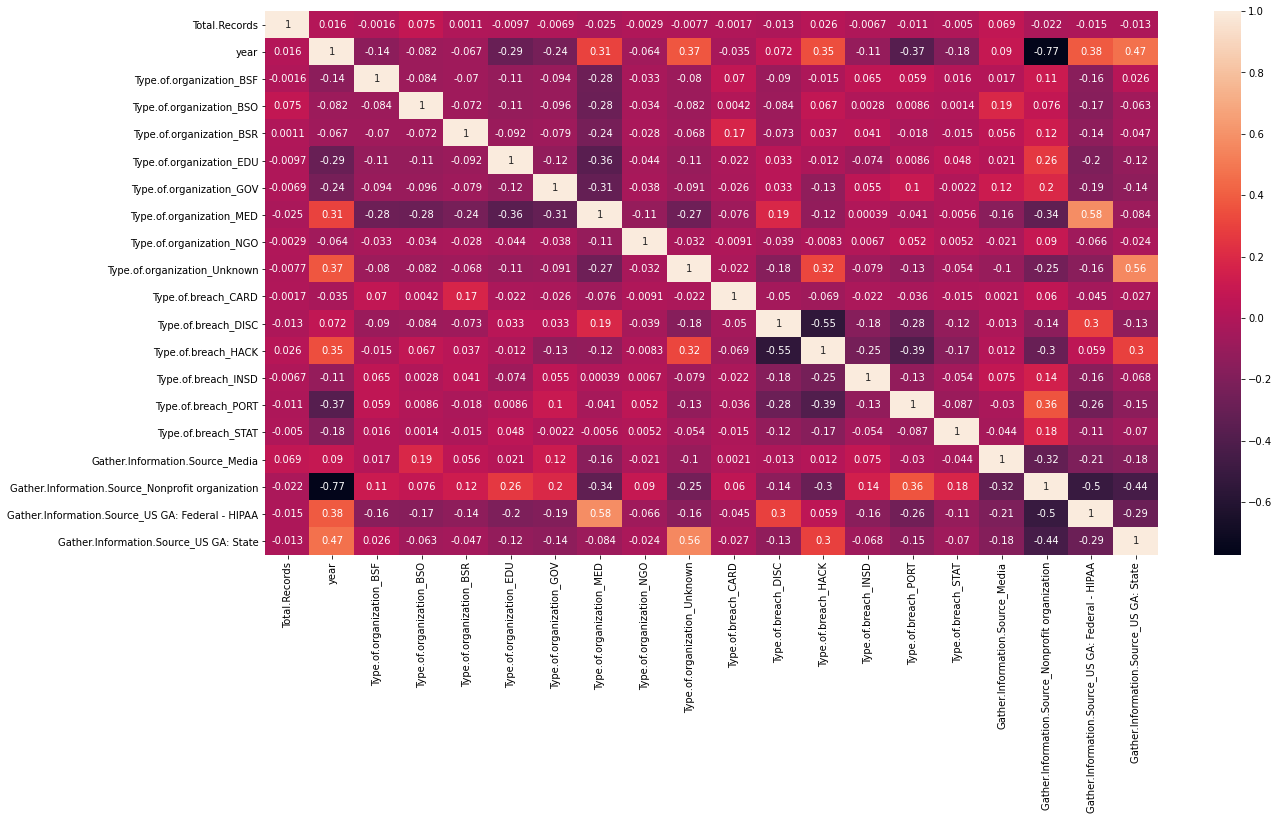

In [101]:
import seaborn as sb
plt.figure(figsize = (20,10))
sb.heatmap(df3.corr() , annot = True)

In [125]:
coef

year                                                0.447970
Type.of.organization_BSO                            0.207963
Gather.Information.Source_Media                     0.132692
Type.of.breach_HACK                                 0.047540
Gather.Information.Source_Nonprofit organization    0.029044
Gather.Information.Source_US GA: State              0.022943
Type.of.organization_MED                            0.019082
Type.of.organization_BSR                            0.018090
Type.of.organization_EDU                            0.015326
Type.of.breach_DISC                                 0.015138
Type.of.organization_GOV                            0.013070
Type.of.breach_PORT                                 0.011191
Type.of.organization_BSF                            0.010561
Type.of.breach_INSD                                 0.004786
Gather.Information.Source_US GA: Federal - HIPAA    0.003659
Type.of.breach_STAT                                 0.000416
Type.of.organization_Unk

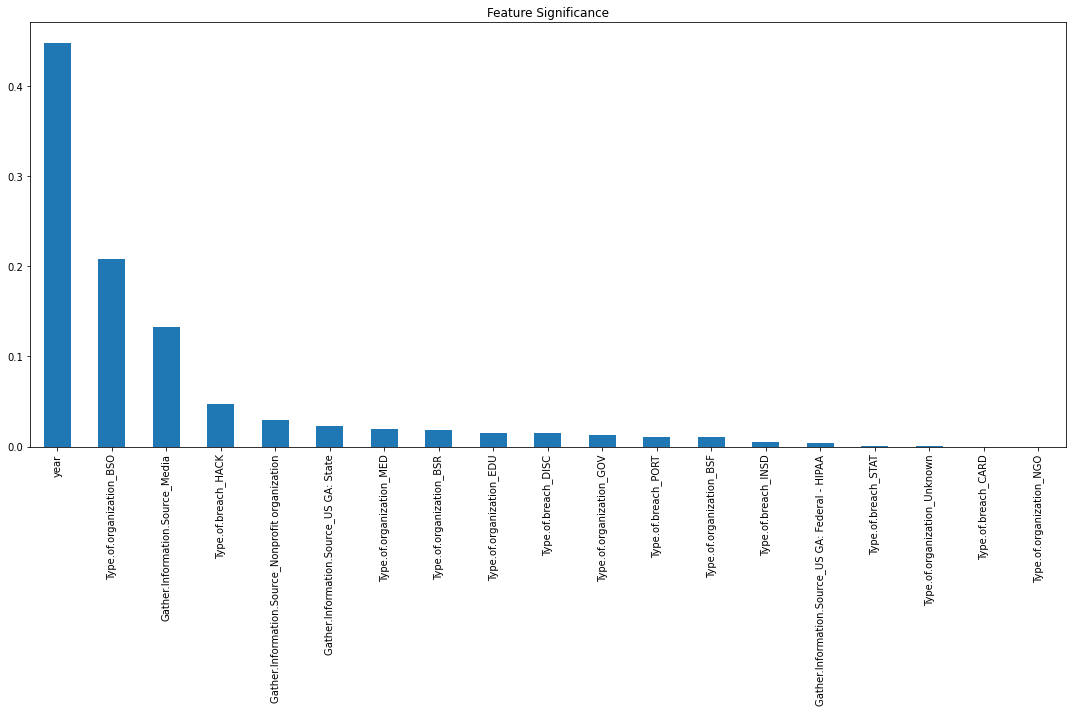

In [124]:

coef = pd.Series(rf_model.feature_importances_, index = X_Train.columns).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mset = mean_squared_error(y_val, rf_y_pred)
rmse = np.sqrt(mset)
rmse

75664365.12553743

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mset = mean_squared_error(y_Train, rf_y_pred_t)
rmset = np.sqrt(mset)
rmset

17844778.13364318

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.14


In [ ]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)
#importances

In [126]:
regressor = DecisionTreeRegressor(random_state = 42, max_leaf_nodes=10) 
  
# fit the regressor with X and Y data
regressor.fit(X_Train, y_Train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [127]:
rt_y_pred = regressor.predict(X_val)

In [128]:
rt_y_pred_t = regressor.predict(X_Train)

In [129]:
errorsrt = abs(rt_y_pred - y_val)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsrt), 2), 'degrees.')

Mean Absolute Error: 3039439.24 degrees.


In [130]:
errorsrt1 = abs(rt_y_pred_t - y_Train)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsrt1), 2), 'degrees.')

Mean Absolute Error: 1313704.54 degrees.


In [131]:
ecart = ((np.mean(errorsrt) -np.mean(errorsrt1))/np.mean(errorsrt1))*100
ecart

131.36398972331364

In [ ]:

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tuning_model=GridSearchCV(regressor,param_grid=parameters, scoring='neg_mean_squared_error',cv=3,verbose=3)

In [131]:
tuning_model.fit(X_Train, y_Train)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [0, 22, 44, 66, 88, 111, 133, 155, 177, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_Train, y_Train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 41.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=20, n_jobs=None,
                  

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 66}

In [ ]:
rf_random.best_score_

0.0027678405545560336

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=66, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_random.best_index_

33

In [ ]:
rf_pred_cv=rf_random.predict(X_val)

In [ ]:
rf_pred_cv_t=rf_random.predict(X_Train)

In [ ]:
errorsrt1 = abs(rf_pred_cv_t - y_Train)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsrt1), 2), 'degrees.')

Mean Absolute Error: 791478.5 degrees.


In [ ]:
errorsrt2 = abs(rf_pred_cv - y_val)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsrt2), 2), 'degrees.')

Mean Absolute Error: 2317712.76 degrees.


In [ ]:
ecart = ((np.mean(errorsrt2) -np.mean(errorsrt1))/np.mean(errorsrt1))*100
ecart

192.83332065957532

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_Train, y_Train)
base_accuracy = evaluate(base_model, X_Train, y_Train)

Model Performance
Average Error: 1213492.2931 degrees.
Accuracy = -460574.33%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_Train, y_Train)

Model Performance
Average Error: 791478.4969 degrees.
Accuracy = -9704.09%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -97.89%.


In [133]:
errors = abs(rf_pred_cv_t - y_Train)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 791478.5 degrees.


In [ ]:
errors = abs(rf_pred_cv - y_val)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2946684.41 degrees.
